# Data Analysis on Star Wars Movies

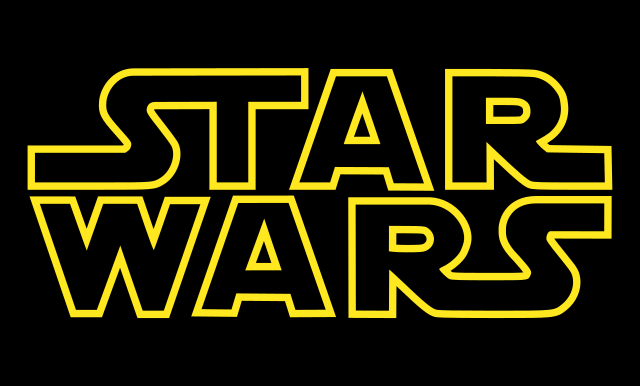
                                                        

## <font color='#0044FB'>Introduction</font>

Before the release of **Star Wars: The Force Awakens**, the good people at [FiveThirtyEight](https://fivethirtyeight.com/) became interested in answering some questions about Star Wars fans and preferences. In particular, they wondered: does the rest of America realize that *The Empire Strikes Back* is clearly the best of the bunch?

The team needed to collect data addressing this question. To do this, they surveyed Star Wars fans in the USA using an online tool. They received a total of 835 responses, which can be found in their [GitHub repository](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey).

The dataset features several columns, including:

   - `RespondentID` - An anonymized ID for the respondent (person taking the survey)
   - `Gender` - The respondent's gender
   - `Age` - The respondent's age
   - `Household Income` - The respondent's income
   - `Education` - The respondent's education level
   - `Location (Census Region)` - The respondent's location
   - `Have you seen any of the 6 films in the Star Wars franchise?` - Has a `Yes` or `No` response
   - `Do you consider yourself to be a fan of the Star Wars film franchise?` Has a `Yes` or `No` response

There are various other columns containing answers to questions about George Lucas' saga.
For some questions, the respondent had to check one or more boxes. Since this type of data is difficult to represent in columnar format, some data cleaning is needed.

May the force be with me! Let's begin.


In [1]:
# Import libraries and read the dataset csv file

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('star_wars.csv', encoding='ISO-8859-1')

In [2]:
df.shape

(1187, 38)

In [3]:
df.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1187 entries, 0 to 1186
Data columns (total 38 columns):
 #   Column                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                         --------------  -----  
 0   RespondentID                                                                                                                                   1186 non-null   float64
 1   Have you seen any of the 6 films in the Star Wars franchise?                                                                                   1187 non-null   object 
 2   Do you consider yourself to be a fan of the Star Wars film franchise?                                                                          837 non-null    object 
 3   Which of the following Star 

## <font color='#0044FB'>Data Cleaning</font>

In [5]:
# Check for duplicates

df.duplicated().sum()

0

In [6]:
# Drop columns related to the expanded universe and star trek as we'll focus the analysis on the original saga

cols = [29,30,31,32]
df.drop(df.columns[cols],axis=1,inplace=True)

In [7]:
df.RespondentID.isnull().value_counts()

False    1186
True        1
Name: RespondentID, dtype: int64

In [8]:
# Drop rows where the RespondentID is null

df.dropna(subset=['RespondentID'], inplace=True) 

df.RespondentID.isnull().value_counts()

False    1186
Name: RespondentID, dtype: int64

We can make the data a bit easier to analyse by converting the first two yes/no columns to a boolean feature having only the values `True`, `False`, and `NaN`. Booleans are easier to work with because we can select the rows that are True or False without having to do a string comparison.

In [9]:
# Mapping Yes/No Columns

resp = { "Yes": True, "No": False }
columns = ["Have you seen any of the 6 films in the Star Wars franchise?","Do you consider yourself to be a fan of the Star Wars film franchise?"]

for col in columns:
    df[col] = df[col].map(resp)

In [10]:
# Columns check 

for col in columns :
    print(df[col].value_counts())    

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64
True     552
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64


In [11]:
# Rename columns to shorter names

names = {"Have you seen any of the 6 films in the Star Wars franchise?": "Have you seen any Star Wars film?",
         "Do you consider yourself to be a fan of the Star Wars film franchise?": "Are you a Star Wars fan",
               }
df.rename(names, inplace = True, axis = 1)

In [12]:
df.head()

,RespondentID,Have you seen any Star Wars film?,Are you a Star Wars fan,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


The next six columns represent a single checkbox question. The question is about which Star Wars films the respondent has seen. We are going to convert those columns to `boolean` features and rename them to shorter, more intuitive names.

In [13]:
# Rename columns

new_names = {"Which of the following Star Wars films have you seen? Please select all that apply.": "Episode I",
               "Unnamed: 4": "Episode II",
               "Unnamed: 5": "Episode III",
               "Unnamed: 6": "Episode IV",
               "Unnamed: 7": "Episode V",
               "Unnamed: 8": "Episode VI"
               }
df.rename(new_names, inplace = True, axis = 1)

In [14]:
# Convert to booleans

movie_mapping = {
    "Star Wars: Episode I  The Phantom Menace": True,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True,
    np.nan: False
}

for col in df.columns[3:9]:
    df[col] = df[col].map(movie_mapping)
    
df.head()

,RespondentID,Have you seen any Star Wars film?,Are you a Star Wars fan,Episode I,Episode II,Episode III,Episode IV,Episode V,Episode VI,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,NaN,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


The following six columns represent the respondent's rank to each Star Wars movie in order of most favourite (1) to least favourite (6). Therefore, each of the following columns can contain the value `1`, `2`, `3`, `4`, `5`, `6`, or `NaN`. 

We are going to convert those columns to a numeric type and rename them to more intuitive names.

In [15]:
# Numeric conversion

df[df.columns[9:15]] = df[df.columns[9:15]].astype(float)

# Rename columns

df = df.rename(columns={
    "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "Ranking 1",
    'Unnamed: 10':'Ranking 2',
    'Unnamed: 11':'Ranking 3',
    'Unnamed: 12':'Ranking 4',
    'Unnamed: 13':'Ranking 5',
    'Unnamed: 14':'Ranking 6'})

# Check the result

df.loc[:,"Ranking 1":"Ranking 6"].head()

,Ranking 1,Ranking 2,Ranking 3,Ranking 4,Ranking 5,Ranking 6
1,3.0,2.0,1.0,4.0,5.0,6.0
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,2.0,3.0,4.0,5.0,6.0
4,5.0,6.0,1.0,2.0,4.0,3.0
5,5.0,4.0,6.0,2.0,1.0,3.0


In [16]:
df.head()

,RespondentID,Have you seen any Star Wars film?,Are you a Star Wars fan,Episode I,Episode II,Episode III,Episode IV,Episode V,Episode VI,Ranking 1,...,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3.0,...,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,NaN,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5.0,...,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


Columns 15 to 28 have `NaN`, `Very Favourably`, `Somewhat Favourably`, `Somewhat Unfavourably`, `Very Unfavourably` and `Neither favorably nor unfavorably (neutral)` values.

Participants were asked whether they view a certain character favourably or unfavourably. To make the analysis easier we will replace each column's name with the corresponding character's name.


In [17]:
# Creating a variable with every character's name

char_names = pd.DataFrame(df.iloc[0,15:29])

# Renaming columns 15 to 28 for each character's name

char_dict={'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.':'Han Solo',
               'Unnamed: 16': 'Luke Skywalker',
               'Unnamed: 17': 'Princess Leia Organa',
               'Unnamed: 18': 'Anakin Skywalker',
               'Unnamed: 19': 'Obi Wan Kenobi',
               'Unnamed: 20': 'Emperor Palpatine',
               'Unnamed: 21': 'Darth Vader',
               'Unnamed: 22': 'Lando Calrissian',
               'Unnamed: 23': 'Boba Fett',
               'Unnamed: 24': 'C-3P0',
               'Unnamed: 25': 'R2 D2',
               'Unnamed: 26': 'Jar Jar Binks',
               'Unnamed: 27': 'Padme Amidala',
               'Unnamed: 28': 'Yoda'
               }
df = df.rename(columns = char_dict)

In [18]:
df.head()

,RespondentID,Have you seen any Star Wars film?,Are you a Star Wars fan,Episode I,Episode II,Episode III,Episode IV,Episode V,Episode VI,Ranking 1,...,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3.0,...,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,NaN,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5.0,...,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [19]:
df.columns

Index(['RespondentID', 'Have you seen any Star Wars film?',
       'Are you a Star Wars fan', 'Episode I', 'Episode II', 'Episode III',
       'Episode IV', 'Episode V', 'Episode VI', 'Ranking 1', 'Ranking 2',
       'Ranking 3', 'Ranking 4', 'Ranking 5', 'Ranking 6', 'Han Solo',
       'Luke Skywalker', 'Princess Leia Organa', 'Anakin Skywalker',
       'Obi Wan Kenobi', 'Emperor Palpatine', 'Darth Vader',
       'Lando Calrissian', 'Boba Fett', 'C-3P0', 'R2 D2', 'Jar Jar Binks',
       'Padme Amidala', 'Yoda', 'Gender', 'Age', 'Household Income',
       'Education', 'Location (Census Region)'],
      dtype='object')

## <font color='#0044FB'>Data Analysis</font>

### <font color='#0044FB'>Movie Ranking</font>

Now that we've cleaned up some columns, we can move to EDA and find out more how each movie performed according to Star Wars fans. Let's begin by checking the **mean rank** for each movie and  the **highest-ranked** episode.

Remember that, as we have seen, the ranking scale goes from `1.0` (Best) to `6.0` (Worst), so it is negative oriented.

In [20]:
df["Ranking 1"].value_counts()

4.0    237
6.0    168
3.0    130
1.0    129
5.0    100
2.0     71
Name: Ranking 1, dtype: int64

In [21]:
# Find the average rating for each movie

means = df[df.columns[9:15]].mean()
means

Ranking 1    3.732934
Ranking 2    4.087321
Ranking 3    4.341317
Ranking 4    3.272727
Ranking 5    2.513158
Ranking 6    3.047847
dtype: float64

#### The most and least ranked movies

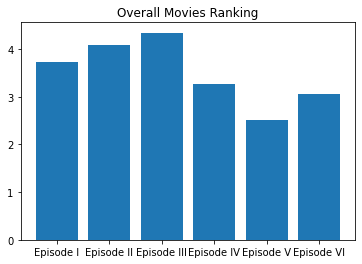

In [22]:
# Plot the results

plt.bar(range(6), means, tick_label = df.columns[3:9])
plt.title('Overall Movies Ranking')
plt.show()

Lower rankings indicate better results, therefore, by plotting the average ranking we can see that:

- the **Episode V: The Empire Strikes Back** (1980) is considered the best movie of the saga from Star Wars fans
- the second best movie is the **Episode VI: Return of the Jedi** (1983)
- on the third place lies the **Epsidode IV: A New Hope** (1977), not much farther behind

This finding confirms  FiveThirtyEight people statement that *The Empire Strikes Back is clearly the best of the bunch*.

The prequel movies, aka the first three ones when following the chronological order of the events, all have worse ratings than the original trilogy. More specifically, the lowest rated movie is **Episode III: Revenge of the Sith** (2005).

Maybe this result could be due to a "nostalgia" factor for which the older movies got a higher rating, rather than the fact that the movie production of the prequels did not satisfy the fans.

It is also true that the fans' expectations for the prequels were incredibliy high and difficult to match in any case, due to the "cult" status already reached by the Star Wars universe.


A more technical and critical review on every Star Wars movie can be found [here](https://www.vulture.com/2018/05/every-star-wars-movie-ranked-from-worst-to-best.html).

### <font color='#0044FB'>Movie Views</font>

We continue ore analysis by focusing now on the number of people that have seen each movie, for which we can find out which movie was seen by **the most and the least** amount of viewers.

In [23]:
df[df.columns[3:9]].sum()

Episode I      673
Episode II     571
Episode III    550
Episode IV     607
Episode V      758
Episode VI     738
dtype: int64

#### The most and least seen movies

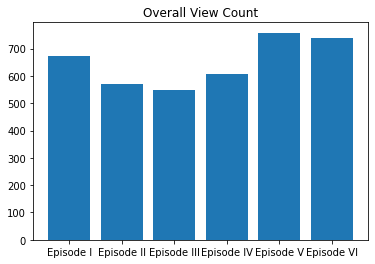

In [24]:
# Plot the results

plt.bar(range(6), df[df.columns[3:9]].sum(), tick_label = df.columns[3:9])
plt.title('Overall View Count')
plt.show()

The **Episode V: The Empire Strikes Back** (1980) is the most viewed among the first 6 Star Wars films. This was also the movie that respondents picked as the best movie on average. This however does not follow for the rest of the movies. 

Unsurprisingly, the overall view count for the original trilogy (Episodes 4-6) is much higher than the second trilogy. These films have been released in the late 70s and early 80s, which allows for more views compared to the sequel trilogy (Episodes 1-3). This could also help explain why the popularity of the original trilogy is much higher.
 
The third most watched film is the **Episode I: The Phantom Menace** (1999). It makes sense, as 16 years passed since the Episode VI release in 1983, and Star Wars fans were surely excited for a new movie after such a long time.

It comes with little surprise that the least watched film is the **Episode III: Revenge of the Sith** as it was the worst rated, too. Since the Episode I did not receive a high rating despite having a large amount of views, it might have killed interest in the following prequel movies.

### <font color='#0044FB'>Fans Analysis</font>

We will now group the survey respondents by their answer to the question: *Do you consider yourself to be a fan of the Star Wars film franchise?*

One group will be the **self-identified fans** compared to the respondents who openly are **not fans**. We will see how these segments view and ranked the movies compared to the population as a whole.


In [25]:
df[df.columns[2]].value_counts(dropna = False)

True     552
NaN      350
False    284
Name: Are you a Star Wars fan, dtype: int64

It is important to note that in this analysis there are 350 respondents that did not answer this question. We will assume they do not consider themselves fans of the film franchise.

In [26]:
# Replace null values

df['Are you a Star Wars fan'] = df['Are you a Star Wars fan'].fillna(False)

In [27]:
df[df.columns[2]].value_counts()

False    634
True     552
Name: Are you a Star Wars fan, dtype: int64

#### Ranking by fans/not fans

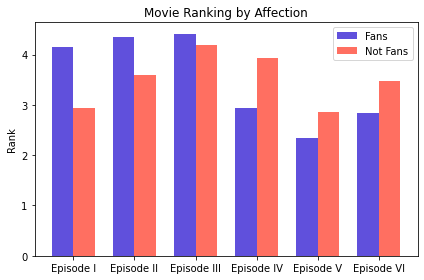

In [28]:
# Selecting targets

fans = df[df['Are you a Star Wars fan'] == True]
not_fans = df[df['Are you a Star Wars fan'] == False]


# Create the plot

labels = df.columns[3:9]
x = np.arange(len(labels))
width = 0.35


fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, fans.loc[:,"Ranking 1":"Ranking 6"].mean(), width, label='Fans', color='#6050dc')
rects2 = ax.bar(x + width/2, not_fans.loc[:,"Ranking 1":"Ranking 6"].mean(), width, label='Not Fans', color='#ff6f61')

ax.set_ylabel('Rank')
ax.set_title('Movie Ranking by Affection')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.show()

The ranking of Star Wars self-identified **fans** follow the same order as the population as a whole.

However, the ranking of Star Wars **non-fans** is very different compared to the population as a whole and the fans community:

- The Episode V is still the chosen favorite on average. However the next highest rated film for this segment is the **Episode I: The Phantom Menace** with a very similar score. Another high rated film is the Episode VI, where the fans / not fans difference is kind evident.
- The non fans seem to **not have a bias** towards the original trilogy compared to the prequels like the self-identified fans do, but it is now clear that the highest rated movie by both fans and non-fans alike is the Episode V, aka the second movie produced in the year 1980.

#### Views by fans/not fans

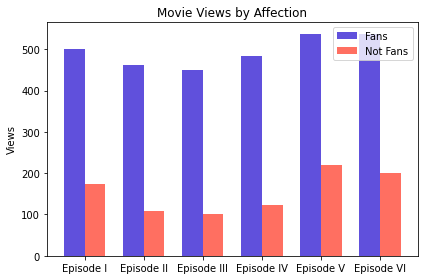

In [29]:
# Create the plot

labels = df.columns[3:9]
x = np.arange(len(labels))
width = 0.35


fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, fans[df.columns[3:9]].sum(), width, label='Fans', color='#6050dc')
rects2 = ax.bar(x + width/2, not_fans[df.columns[3:9]].sum(), width, label='Not Fans', color='#ff6f61')

ax.set_ylabel('Views')
ax.set_title('Movie Views by Affection')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.show()

The order of the films by most watched to least watched is the same for the population as a whole, fans, and non-fans. There of course is large variance between films being seen by fans and non-fans, as the latter are less likely to watch these movies if they openly admit to not like Star Wars film franchise.

### <font color='#0044FB'>Gender Analysis</font>

Let's dive deeper in our analysis by splitting the public according to the gender. Will there be differences between male and female behaviour?

In [30]:
# Selecting responses by gender

male = df[df["Gender"] == "Male"]
female = df[df["Gender"] == "Female"]

#### Ranking by gender

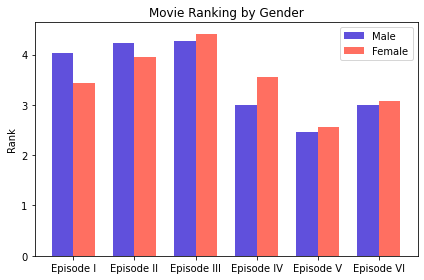

In [31]:
# Create the plot

labels = df.columns[3:9]
x = np.arange(len(labels))
width = 0.35


fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, male.loc[:,"Ranking 1":"Ranking 6"].mean(), width, label='Male', color='#6050dc')
rects2 = ax.bar(x + width/2, female.loc[:,"Ranking 1":"Ranking 6"].mean(), width, label='Female', color='#ff6f61')

ax.set_ylabel('Rank')
ax.set_title('Movie Ranking by Gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.show()

The pattern for both male and female viewers is the same as for the general public. However, the biggest difference between these two audience groups is that, in general, the **female** public preferred the **original trilogy** more rather than the male counterpart, while the **male** population liked more the **prequels**, with the exception of the Episode III.

#### Views by gender

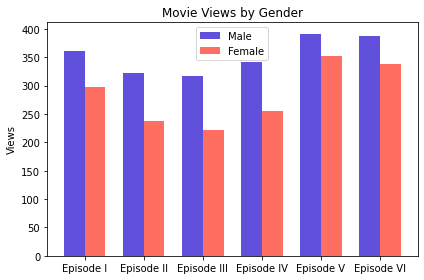

In [32]:
# Create the plot

labels = df.columns[3:9]
x = np.arange(len(labels))
width = 0.35


fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, male[df.columns[3:9]].sum(), width, label='Male', color='#6050dc')
rects2 = ax.bar(x + width/2, female[df.columns[3:9]].sum(), width, label='Female', color='#ff6f61')

ax.set_ylabel('Views')
ax.set_title('Movie Views by Gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.show()

The pattern is the same here, since there are no differences between the genders as both follow the general population trend. We can however say that the **view counts are higher for males** rather than females.

### <font color='#0044FB'>Education Analysis</font>

Do people with different education levels have different preferences regarding the Star Wars franchise? Let's check.

In [33]:
# Education levels

df['Education'].value_counts()

Some college or Associate degree    328
Bachelor degree                     321
Graduate degree                     275
High school degree                  105
Less than high school degree          7
Name: Education, dtype: int64

In [34]:
# Very small quantity of people with a lower education. This is not representative and we'll drop it 

df.drop(df.loc[df['Education']== "Less than high school degree"].index, inplace=True)

In [35]:
df['Education'].value_counts()

Some college or Associate degree    328
Bachelor degree                     321
Graduate degree                     275
High school degree                  105
Name: Education, dtype: int64

In [36]:
df['Education'].isnull().value_counts()

False    1029
True      150
Name: Education, dtype: int64

In [37]:
# Create pivot tables

ranking_by_education = df.pivot_table(index="Education", values=df.columns[9:15])
print(ranking_by_education)

view_by_education = df.pivot_table(index="Education", values=df.columns[3:9])
print(view_by_education)

                                  Ranking 1  Ranking 2  Ranking 3  Ranking 4  \
Education                                                                      
Bachelor degree                    3.828244   4.290076   4.521073   3.114504   
Graduate degree                    3.822222   4.225664   4.500000   3.199115   
High school degree                 3.802817   3.746479   4.126761   3.211268   
Some college or Associate degree   3.551181   3.885827   4.102362   3.503937   

                                  Ranking 5  Ranking 6  
Education                                               
Bachelor degree                    2.309160   2.931298  
Graduate degree                    2.323009   2.920354  
High school degree                 2.873239   3.239437  
Some college or Associate degree   2.783465   3.173228  
                                  Episode I  Episode II  Episode III  \
Education                                                              
Bachelor degree                  

#### Ranking by education

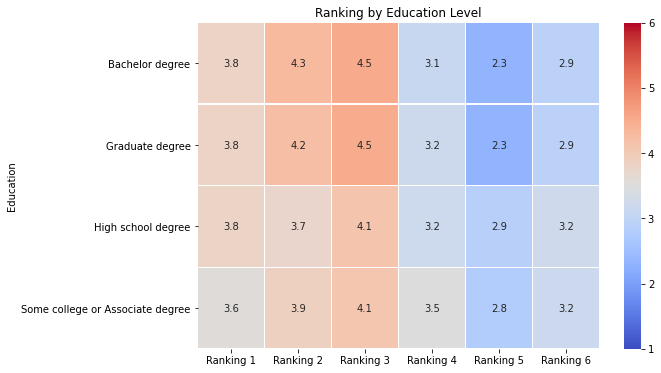

In [38]:
# Plotting a heatmap for ranking

f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(ranking_by_education, annot=True, linewidths=.5, vmin=1, vmax=6, ax=ax, cmap="coolwarm")
ax.set_title('Ranking by Education Level')
plt.show()

#### Views by education

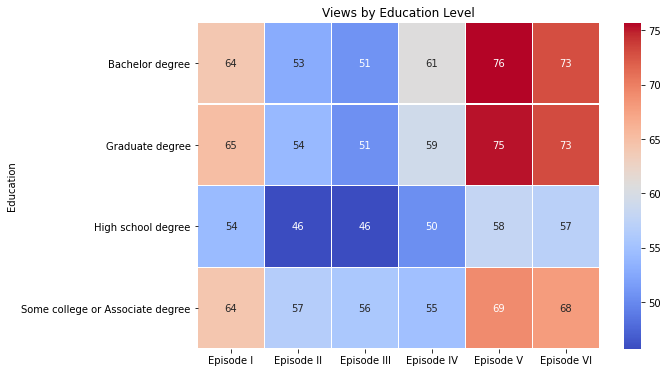

In [39]:
# Plotting a heatmap for views

f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(view_by_education*100, annot=True, linewidths=.5, ax=ax, cmap="coolwarm")
ax.set_title('Views by Education Level')
plt.show()

The correlation matrix displayed shows that respondents with a **bachelor/graduate degree** were the ones who most liked the Episode V and those who least liked the Episode III of Star Wars franchise.

We also have to say that, even though the 75% of these respondents watched the Episode V, just the 51% watched the Episode III.

People with a **high school education** are those who least watched the Episodes II and III.

On the contrary, people with higher education (bachelor/graduates) are those who most watched the original trilogy, especially the last two chapters of the saga.

### <font color='#0044FB'>Income Analysis</font>

Do people with different income levels have different preferences regarding the Star Wars universe? Let's find out.

In [58]:
# Income levels

df['Household Income'].value_counts()

$50,000 - $99,999      297
$25,000 - $49,999      185
$100,000 - $149,999    141
$0 - $24,999           136
$150,000+               95
Name: Household Income, dtype: int64

In [59]:
# Create pivot tables

ranking_by_income = df.pivot_table(index='Household Income', values=df.columns[9:15])
print(ranking_by_income)

views_by_income = df.pivot_table(index='Household Income', values=df.columns[3:9])
print(views_by_income)

                     Ranking 1  Ranking 2  Ranking 3  Ranking 4  Ranking 5  \
Household Income                                                             
$0 - $24,999          3.816327   3.959184   4.102041   3.173469   2.744898   
$100,000 - $149,999   3.756522   4.173913   4.403509   3.400000   2.400000   
$150,000+             3.740260   4.376623   4.571429   2.961039   2.324675   
$25,000 - $49,999     3.469388   3.870748   4.251701   3.646259   2.482993   
$50,000 - $99,999     3.817797   4.172996   4.345992   3.092827   2.451477   

                     Ranking 6  
Household Income                
$0 - $24,999          3.204082  
$100,000 - $149,999   2.852174  
$150,000+             3.025974  
$25,000 - $49,999     3.278912  
$50,000 - $99,999     3.109705  
                     Episode I  Episode II  Episode III  Episode IV  \
Household Income                                                      
$0 - $24,999          0.551471    0.485294     0.470588    0.536765   
$100,000 

#### Ranking by income

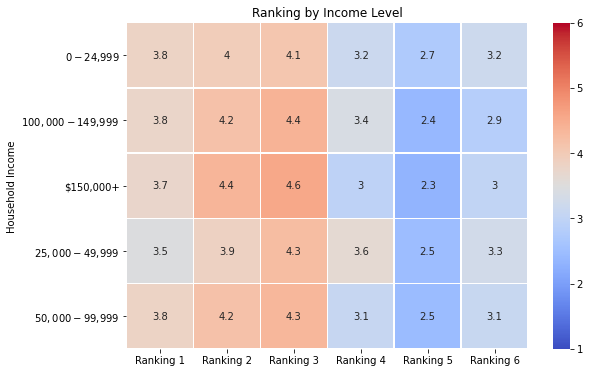

In [60]:
# Plotting a heatmap for ranking

f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(ranking_by_income, annot=True, linewidths=.5, vmin=1, vmax=6, ax=ax, cmap="coolwarm")
ax.set_title('Ranking by Income Level')
plt.show()

#### Views by income

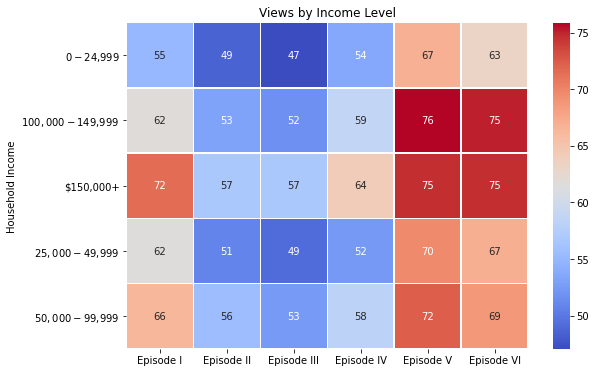

In [61]:
# Plotting a heatmap for views

f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(views_by_income*100, annot=True, linewidths=.5, ax=ax, cmap="coolwarm")
ax.set_title('Views by Income Level')
plt.show()

When analysing respondants' household income level, no substantial differences appear in the general pattern. The best rated movies always are the chapters of the original trilogy and this is valid for all income ranges.

Talking about views, the most viewed episodes of Star Wars universe still are the V and the VI. The overall view count for the original trilogy is higher than the second trilogy, as it is when considering the general public as a whole.

### <font color='#0044FB'>Age Analysis</font>

We will now group the survey respondents by their age. Will there be differences among these segments?

In [40]:
df.Age.value_counts()

45-60    290
> 60     268
30-44    267
18-29    214
Name: Age, dtype: int64

In [41]:
teen = df[df["Age"] == "18-29"]
youngs = df[df["Age"] == "30-44"]
adults = df[df["Age"] == "45-60"]
senior = df[df["Age"] == "> 60"]

#### Ranking by age

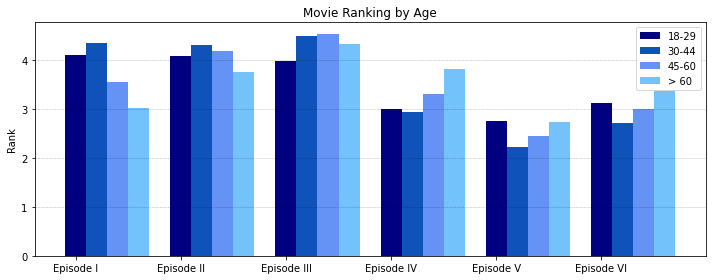

In [42]:
# Create the plot

labels = df.columns[3:9]
x = np.arange(len(labels))
width = 0.2
fig, ax = plt.subplots(figsize=(10,4))

ax.bar(x ,teen.loc[:,"Ranking 1":"Ranking 6"].mean(), width, label='18-29', color='#000080')
ax.bar(x + width,youngs.loc[:,"Ranking 1":"Ranking 6"].mean(), width, label='30-44', color='#0F52BA')
ax.bar(x + (2 * width),adults.loc[:,"Ranking 1":"Ranking 6"].mean(), width, label='45-60', color='#6593F5')
ax.bar(x + (3 * width),senior.loc[:,"Ranking 1":"Ranking 6"].mean(), width, label='> 60', color='#73C2FB')

ax.set_ylabel('Rank')
ax.set_title('Movie Ranking by Age')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)

fig.tight_layout()
plt.show()

As we can see, people with an age of +60 years old gave a worst rating to the original trilogy compared to the youngest segment of people (<29 years old).

People between 30 and 45 years old are the segment who gave the best scoring to all movies from the original trilogy. They also were those who least rated the preequels.

The **biggest variance** is found in the rating of the Episode I, where senior people gave a good rating but younger participants were more disappointed. Also in the rating of the Episode IV there is a difference between senior people, who gave a bad rating, and youngsters, who where not that disappointed.

#### Views by age

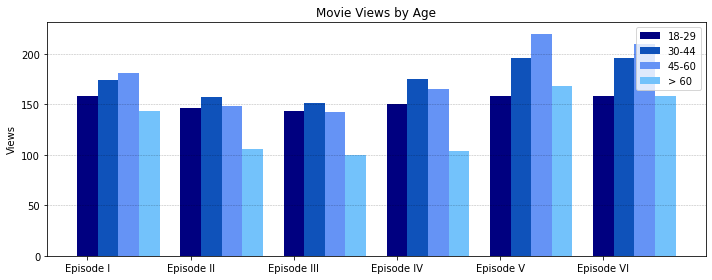

In [43]:
# Create the plot

labels = df.columns[3:9]
x = np.arange(len(labels))
width = 0.2
fig, ax = plt.subplots(figsize=(10,4))

ax.bar(x ,teen[df.columns[3:9]].sum(), width, label='18-29', color='#000080')
ax.bar(x + width,youngs[df.columns[3:9]].sum(), width, label='30-44', color='#0F52BA')
ax.bar(x + (2 * width),adults[df.columns[3:9]].sum(), width, label='45-60', color='#6593F5')
ax.bar(x + (3 * width),senior[df.columns[3:9]].sum(), width, label='> 60', color='#73C2FB')

ax.set_ylabel('Views')
ax.set_title('Movie Views by Age')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)

fig.tight_layout()
plt.show()

The view count for participants of less than 29 years old is quite **uniform**, without big changes from one movie to the other. They seem to not have a bias towards the original trilogy compared to the prequels.

People over 60 years old are the segment with the **lowest view count** in every movie of the franchise, maybe because they do not especially like the sci-fi genre?

The view count is especially low for the episodes II, III and IV.

The most significant difference lies within the view count of people with an age of 45-60, as a lot of them viewed the original trilogy and fewer people viewed the prequels.

### <font color='#0044FB'>Characters Analysis</font>

Each Star Wars character has a unique personality and background. Let's check wich character has been the audience's favourite.

In [44]:
df.columns

Index(['RespondentID', 'Have you seen any Star Wars film?',
       'Are you a Star Wars fan', 'Episode I', 'Episode II', 'Episode III',
       'Episode IV', 'Episode V', 'Episode VI', 'Ranking 1', 'Ranking 2',
       'Ranking 3', 'Ranking 4', 'Ranking 5', 'Ranking 6', 'Han Solo',
       'Luke Skywalker', 'Princess Leia Organa', 'Anakin Skywalker',
       'Obi Wan Kenobi', 'Emperor Palpatine', 'Darth Vader',
       'Lando Calrissian', 'Boba Fett', 'C-3P0', 'R2 D2', 'Jar Jar Binks',
       'Padme Amidala', 'Yoda', 'Gender', 'Age', 'Household Income',
       'Education', 'Location (Census Region)'],
      dtype='object')

In [45]:
df.shape

(1179, 34)

In [46]:
chars = df[df.columns[15:29]]
chars.head()

,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda
1,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A)
4,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably
5,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably


#### Alignment by percentage

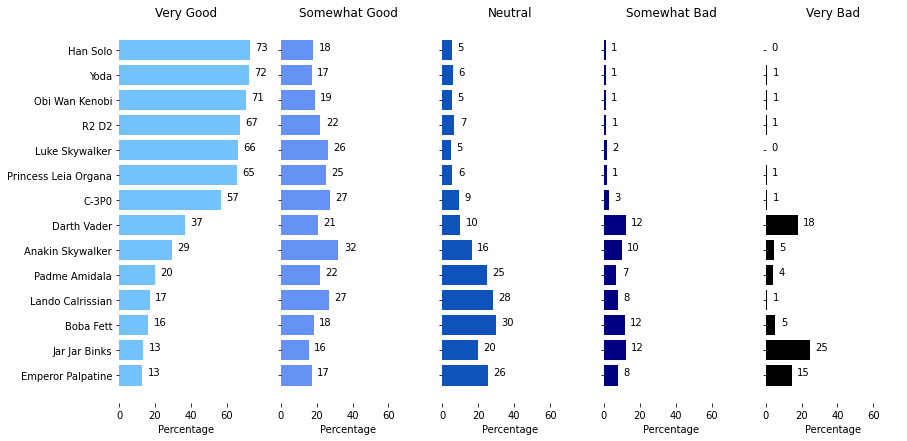

In [47]:
every_movie = df[df[df.columns[9:15]].notnull().all(axis = 1)]

# Plot characters' favourability according to participants perception

char_sequence = ['Emperor Palpatine','Jar Jar Binks','Boba Fett','Lando Calrissian','Padme Amidala','Anakin Skywalker',
                 'Darth Vader','C-3P0','Princess Leia Organa','Luke Skywalker','R2 D2','Obi Wan Kenobi','Yoda','Han Solo']
favourability = ['Very favorably', 'Somewhat favorably','Neither favorably nor unfavorably (neutral)',
                 'Somewhat unfavorably','Very unfavorably']
favourable    = ['Very Good', 'Somewhat Good','Neutral',
                 'Somewhat Bad','Very Bad']
colours       = ['#73C2FB','#6593F5','#0F52BA',"#000080",'black']
per_count     = []


fig = plt.figure(figsize = (14,7))

for i in range(1,6):
    ax = fig.add_subplot(1,5,i)
    char_favourability = every_movie[every_movie.columns[15:29]]
    char_favourability = char_favourability.applymap(lambda value: True if value == favourability[i-1] else False)
    char_favourability = 100 * char_favourability.mean()
    
    for char in char_sequence:
        per_count.append(char_favourability[char])
    
    for c in range(1,15):
        ax.text(per_count[c-1]+3,char_sequence[c-1],int(round(per_count[c-1])))
    ax.set_xlim(0,75)
    ax.barh(char_sequence, per_count, color = colours[i-1])
    ax.set_title(favourable[i-1])
    
    if i > 1:
        ax.set_yticklabels([])
    
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    
    ax.set_xlabel('Percentage')
        
    per_count = []


plt.show()

As we can see, the preferred characters by Star Wars audience is **Han Solo**, followed by Jedi master **Yoda** and then **Obi Wan Kenobi** in the third place, with very little differences.

The least favourite characters are: **Jar Jar Binks** in the first place, then **Darth Vader** and with little distance **Emperor Palpatine**. This confirms the public critiques towards Jar Jar Binks, because even if it is a good-aligned character (contrarily to Darth Vader and Palpatine), the public found it too cartoonish and with racist traits, so it quickly became the most hated character in the Star Wars saga.

#### Alignment by gender

In [48]:
male = every_movie[every_movie['Gender'] == 'Male']
female = every_movie[every_movie['Gender'] == 'Female']

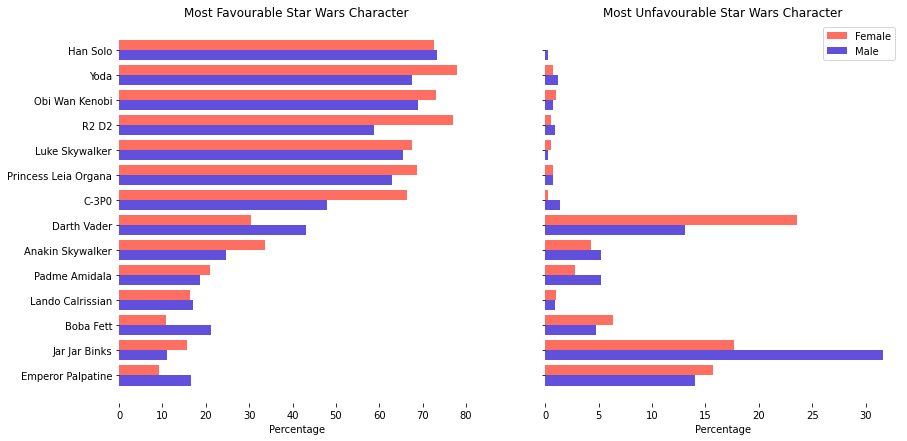

In [49]:
# Plot favourable characters by gender

char_sequence = ['Emperor Palpatine','Jar Jar Binks','Boba Fett','Lando Calrissian','Padme Amidala','Anakin Skywalker',
                 'Darth Vader','C-3P0','Princess Leia Organa','Luke Skywalker','R2 D2','Obi Wan Kenobi','Yoda','Han Solo']
favourability = ['Very favorably','Very unfavorably']
per_count_male = []
per_count_female = []

fig = plt.figure(figsize = (14,7))

for i in range(0,2):
    ax = fig.add_subplot(1,2,i+1)
    unfav_char_male = male[male.columns[15:29]]
    unfav_char_male = unfav_char_male.applymap(lambda value: True if value == favourability[i] else False)
    unfav_char_male = 100 * unfav_char_male.mean()

    unfav_char_female = female[female.columns[15:29]]
    unfav_char_female = unfav_char_female.applymap(lambda value: True if value == favourability[i] else False)
    unfav_char_female = 100 * unfav_char_female.mean()

    for char in char_sequence:
        per_count_male.append(unfav_char_male[char])
        per_count_female.append(unfav_char_female[char])

    length = np.arange(len(char_sequence))
    width=0.4
    ax.barh(length+0.2, per_count_female, width, label = 'Female', color = '#ff6f61')
    ax.barh(length-0.2, per_count_male, width, label = 'Male', color = '#6050dc')
    ax.set_yticks(length)
    ax.set_yticklabels(char_sequence)
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    if i == 0: 
        plt.title('Most Favourable Star Wars Character')
    else:
        plt.title('Most Unfavourable Star Wars Character')
        ax.set_yticklabels([])
    per_count_male = []
    per_count_female = []
    ax.set_xlabel('Percentage')
plt.legend()
plt.show()

The distribution, generally speaking, follows the same order as the population as a whole: the **least favourite** characters are Darth Vader, Palpatine and Jar Jar Binks. Still, there is a significant difference between the gender preferences:
- Female audience does not really like Darth Vader at all, while male respondants are not that "haters" of this character. we
- On the other hand, Jar Jar Binks, which is the least favourite one in general, seems to be more hated by males rather than females.

Talking about the **most favourite** Star Wars characters, the difference is less prominent among the top three:
- Both male and female audience have loved Han Solo, with a very little difference among the genders.
- Jedi master Yoda has a good favourability especially among female respondants. The same happens with Obi Wan Kenobi.
- Nonetheless, it is curious to see that male audience seem to like villains such as Darth Vader, Boba Fett and Emperor Palpatine way more than females.
- On the other hand, it is curious to notice that female respondants like droid characters such as C3P0 and R2 D2 more than the male population.

## <font color='#0044FB'>Conclusion</font>


This analysis' goal was to explore the data collected by FiveThirtyEight website to answer the question: *does the rest of America realise that “The Empire Strikes Back” is clearly the best of the bunch?*

Based on the data explored, we can answer **yes**. It is clear that Star Wars' Episode V: The Empire Strikes Back (1980) is the preferred amongst all the episodes in the Star Wars universe. Apart from being the most watched movie, it also is the one with the best ratings.

Other main findings of this project are:

   1. The Episode 3: Revenge of the Sith is the least liked movie among the respondants.
   
   2. View counts for the whole Star Wars saga are higher for males rather than females.
   3. Respondants aged >60 years old gave a worst rating to the original trilogy compared to the youngest segment (<29 years old).
   4. People aged >60 years old are the segment with the lowest view count for the whole saga. Could this data be related to the movies' sci-fi genre?
   5. The preferred characters are Han Solo, followed by Jedi master Yoda and then Obi Wan Kenobi in the third place, with very little differences.
   6. The least favourite characters are: Jar Jar Binks, Darth Vader and Emperor Palpatine. Even though Jar Jar Binks is a good aligned characted, it has been highly criticised by media and public.
   7. Droid characters such as C3P0 and R2 D2 are most liked by female audience, whereas villains such as Darth Vader and Boba Fett are way more preferred by male respondants.

Next steps: It would be interesting to realise a similar survey to European audience in order to bring new insights and establish comparisons.

I hope you found this analysis interesting.